In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


import os
from PIL import Image

root_dir = r"New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

for class_folder in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_folder)
    if not os.path.isdir(class_path):
        continue

    print(f"\n🔁 Processing class: {class_folder}")
    counter = 1

    for filename in os.listdir(class_path):
        old_path = os.path.join(class_path, filename)

        # Skip non-image files
        if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        # Check image validity
        try:
            with Image.open(old_path) as img:
                img.verify()
        except Exception as e:
            print(f"❌ Deleting corrupted image: {old_path}")
            try:
                os.remove(old_path)
            except:
                print(f"⚠️ Failed to delete: {old_path}")
            continue

        # Generate safe new name
        ext = os.path.splitext(filename)[1]
        new_filename = f"{class_folder[:4]}_{counter:05d}{ext}"
        new_path = os.path.join(class_path, new_filename)

        # Handle duplicates or already-renamed files
        if old_path == new_path:
            counter += 1
            continue
        try:
            os.rename(old_path, new_path)
            print(f"✅ {filename} → {new_filename}")
            counter += 1
        except FileNotFoundError:
            print(f"❌ File not found during rename: {old_path}")
        except FileExistsError:
            print(f"⚠️ Skipped duplicate: {new_path}")
        except Exception as e:
            print(f"⚠️ Error renaming {old_path}: {e}")

  


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train',
  labels= "inferred",
  label_mode= "categorical",
  class_names= None,
  color_mode= "rgb",
  image_size=(128,128),
  batch_size= 32,
  shuffle= True,
  validation_split=None,
  subset=None,
  seed=None,
  interpolation="bilinear"
)

Found 70295 files belonging to 38 classes.


In [21]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
  labels= "inferred",
  label_mode= "categorical",
  class_names= None,
  color_mode= "rgb",
  image_size=(128,128),
  batch_size= 32,
  shuffle= True,
  validation_split=None,
  subset=None,
  seed=None,
  interpolation="bilinear"
)

Found 17572 files belonging to 38 classes.


In [22]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [23]:
for x , y in train_ds:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[145.75 139.75 143.75]
   [152.   146.   150.  ]
   [155.   149.   153.  ]
   ...
   [103.75 116.75 106.75]
   [ 98.25 111.25 101.25]
   [105.5  118.5  108.5 ]]

  [[156.25 150.25 154.25]
   [161.5  155.5  159.5 ]
   [156.75 150.75 154.75]
   ...
   [ 93.   106.    96.  ]
   [122.   135.   125.  ]
   [109.75 122.75 112.75]]

  [[154.5  148.5  152.5 ]
   [154.   148.   152.  ]
   [156.75 150.75 154.75]
   ...
   [104.   117.   107.  ]
   [108.25 121.25 111.25]
   [117.5  130.5  120.5 ]]

  ...

  [[189.25 180.25 183.25]
   [175.75 166.75 169.75]
   [176.5  167.5  170.5 ]
   ...
   [115.   127.   113.  ]
   [109.25 121.25 107.25]
   [111.25 123.25 109.25]]

  [[175.5  166.5  169.5 ]
   [176.25 167.25 170.25]
   [177.   168.   171.  ]
   ...
   [110.   122.   108.  ]
   [109.75 121.75 107.75]
   [106.5  118.5  104.5 ]]

  [[179.25 170.25 173.25]
   [175.5  166.5  169.5 ]
   [178.   169.   172.  ]
   ...
   [118.   130.   116.  ]
   [107.25 119.25 105.25]
   [119.75 131.75 11

 ### Building Model

In [24]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential



In [25]:
model= Sequential()

### To Avoid Overshooting
1. Choose small learning rate 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there amy be possibility taht model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [26]:
## Building Convolutional layer

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [27]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [28]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [29]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [30]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [31]:
model.add(Dropout(0.25))      ## to avoid overfitting

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(units=1024, activation='relu'))

In [34]:
model.add(Dropout(0.4))

In [35]:
#Output Layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

In [36]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

### Model Training

In [38]:
training_history= model.fit(x= train_ds, validation_data= valid_ds, epochs=10)

Epoch 1/10


2197/2197 [==============================] - 220s 94ms/step - loss: 1.4291 - accuracy: 0.5799 - val_loss: 0.5398 - val_accuracy: 0.8330
Epoch 2/10
2197/2197 [==============================] - 206s 94ms/step - loss: 0.4841 - accuracy: 0.8476 - val_loss: 0.2897 - val_accuracy: 0.9062
Epoch 3/10
2197/2197 [==============================] - 206s 94ms/step - loss: 0.2892 - accuracy: 0.9062 - val_loss: 0.1978 - val_accuracy: 0.9356
Epoch 4/10
2197/2197 [==============================] - 257s 117ms/step - loss: 0.1873 - accuracy: 0.9392 - val_loss: 0.1862 - val_accuracy: 0.9394
Epoch 5/10
2197/2197 [==============================] - 280s 127ms/step - loss: 0.1440 - accuracy: 0.9532 - val_loss: 0.1368 - val_accuracy: 0.9575
Epoch 6/10
2197/2197 [==============================] - 368s 168ms/step - loss: 0.1143 - accuracy: 0.9633 - val_loss: 0.1233 - val_accuracy: 0.9603
Epoch 7/10
2197/2197 [==============================] - 341s 155ms/step - loss: 0.0916 - accuracy: 0.9701 - val_loss: 0.1248 -

In [41]:
### Model Evaluation
train_loss, train_acc= model.evaluate(train_ds)
print(train_loss, train_acc)

2197/2197 [==============================] - 66s 30ms/step - loss: 0.0293 - accuracy: 0.9906
0.029252294450998306 0.9905825257301331


In [43]:
#MODEL on Validation set
val_loss, val_acc= model.evaluate(valid_ds)

550/550 [==============================] - 17s 30ms/step - loss: 0.1210 - accuracy: 0.9636


In [44]:
print(val_loss, val_acc)

0.12103817611932755 0.9635784029960632


## Saving Model

In [ ]:
model.save("trained_model.keras")     ## more compressed than h5 file

In [48]:
training_history.history

{'loss': [1.4290851354599,
  0.484125554561615,
  0.2892090082168579,
  0.18730011582374573,
  0.14404261112213135,
  0.11427325010299683,
  0.09164400398731232,
  0.07639355957508087,
  0.06628831475973129,
  0.06013175845146179],
 'accuracy': [0.5799131989479065,
  0.8475852012634277,
  0.9062095284461975,
  0.9391564130783081,
  0.9531688094139099,
  0.9633117318153381,
  0.9700689911842346,
  0.9745501279830933,
  0.978704035282135,
  0.9808663725852966],
 'val_loss': [0.53983473777771,
  0.2896994352340698,
  0.19784413278102875,
  0.18617406487464905,
  0.13678158819675446,
  0.12331923097372055,
  0.1248413473367691,
  0.09246337413787842,
  0.16003957390785217,
  0.12103825807571411],
 'val_accuracy': [0.8330298066139221,
  0.9061574935913086,
  0.9356362223625183,
  0.9394491314888,
  0.9575461149215698,
  0.9603345990180969,
  0.9609606266021729,
  0.9715456366539001,
  0.9543023109436035,
  0.9635784029960632]}

In [49]:
# Recording History in json
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

### Accuracy Visualization

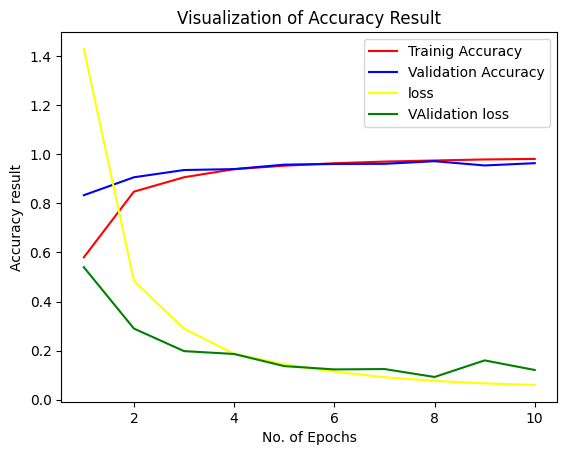

In [57]:
epochs= [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Trainig Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.plot(epochs, training_history.history['loss'], color='yellow', label='loss')
plt.plot(epochs, training_history.history['val_loss'], color='green', label='VAlidation loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some Other metrics for model Evaluation

In [60]:
class_name= valid_ds.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [61]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
  labels= "inferred",
  label_mode= "categorical",
  class_names= None,
  color_mode= "rgb",
  image_size=(128,128),
  batch_size= 32,
  shuffle= False,
  validation_split=None,
  subset=None,
  seed=None,
  interpolation="bilinear"
)

Found 17572 files belonging to 38 classes.


In [62]:
y_pred= model.predict(test_ds)
y_pred

550/550 [==============================] - 16s 28ms/step


array([[1.0000000e+00, 1.0988364e-11, 8.2406392e-14, ..., 1.3601632e-17,
        1.7270139e-16, 9.5462587e-15],
       [9.9999797e-01, 5.8070842e-08, 2.0873140e-11, ..., 3.9879006e-14,
        3.5550347e-13, 1.1386509e-12],
       [9.9999964e-01, 5.0945742e-10, 3.0984575e-12, ..., 7.9242659e-17,
        7.2276119e-15, 3.1259812e-13],
       ...,
       [1.9272262e-10, 9.0379836e-11, 1.1438700e-08, ..., 1.1239979e-09,
        1.1415404e-11, 9.9999702e-01],
       [7.2865651e-11, 7.0416600e-13, 2.2066775e-08, ..., 2.8233460e-09,
        1.6467251e-11, 9.9999583e-01],
       [2.2536763e-19, 5.9068257e-21, 8.1145971e-18, ..., 5.8789344e-19,
        3.9369169e-18, 1.0000000e+00]], dtype=float32)

In [63]:
y_pred.shape

(17572, 38)

In [64]:
predicted_categories= tf.argmax(y_pred, axis=1)

In [65]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [67]:
true_categories= tf.concat([y for  x,y in test_ds], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [68]:
Y_true= tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(Y_true, predicted_categories, target_names= class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.97       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       1.00      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.87      0.92       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.98      0.

In [76]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[471,   4,   0, ...,   0,   0,   0],
       [  1, 481,   0, ...,   0,   0,   0],
       [  0,   0, 430, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 439,   0],
       [  0,   0,   2, ...,   0,   0, 461]], dtype=int64)

## Confusion Matrix Visualization

Text(0.5, 1.0, 'Plant Disease Prediction Confusion Matrix')

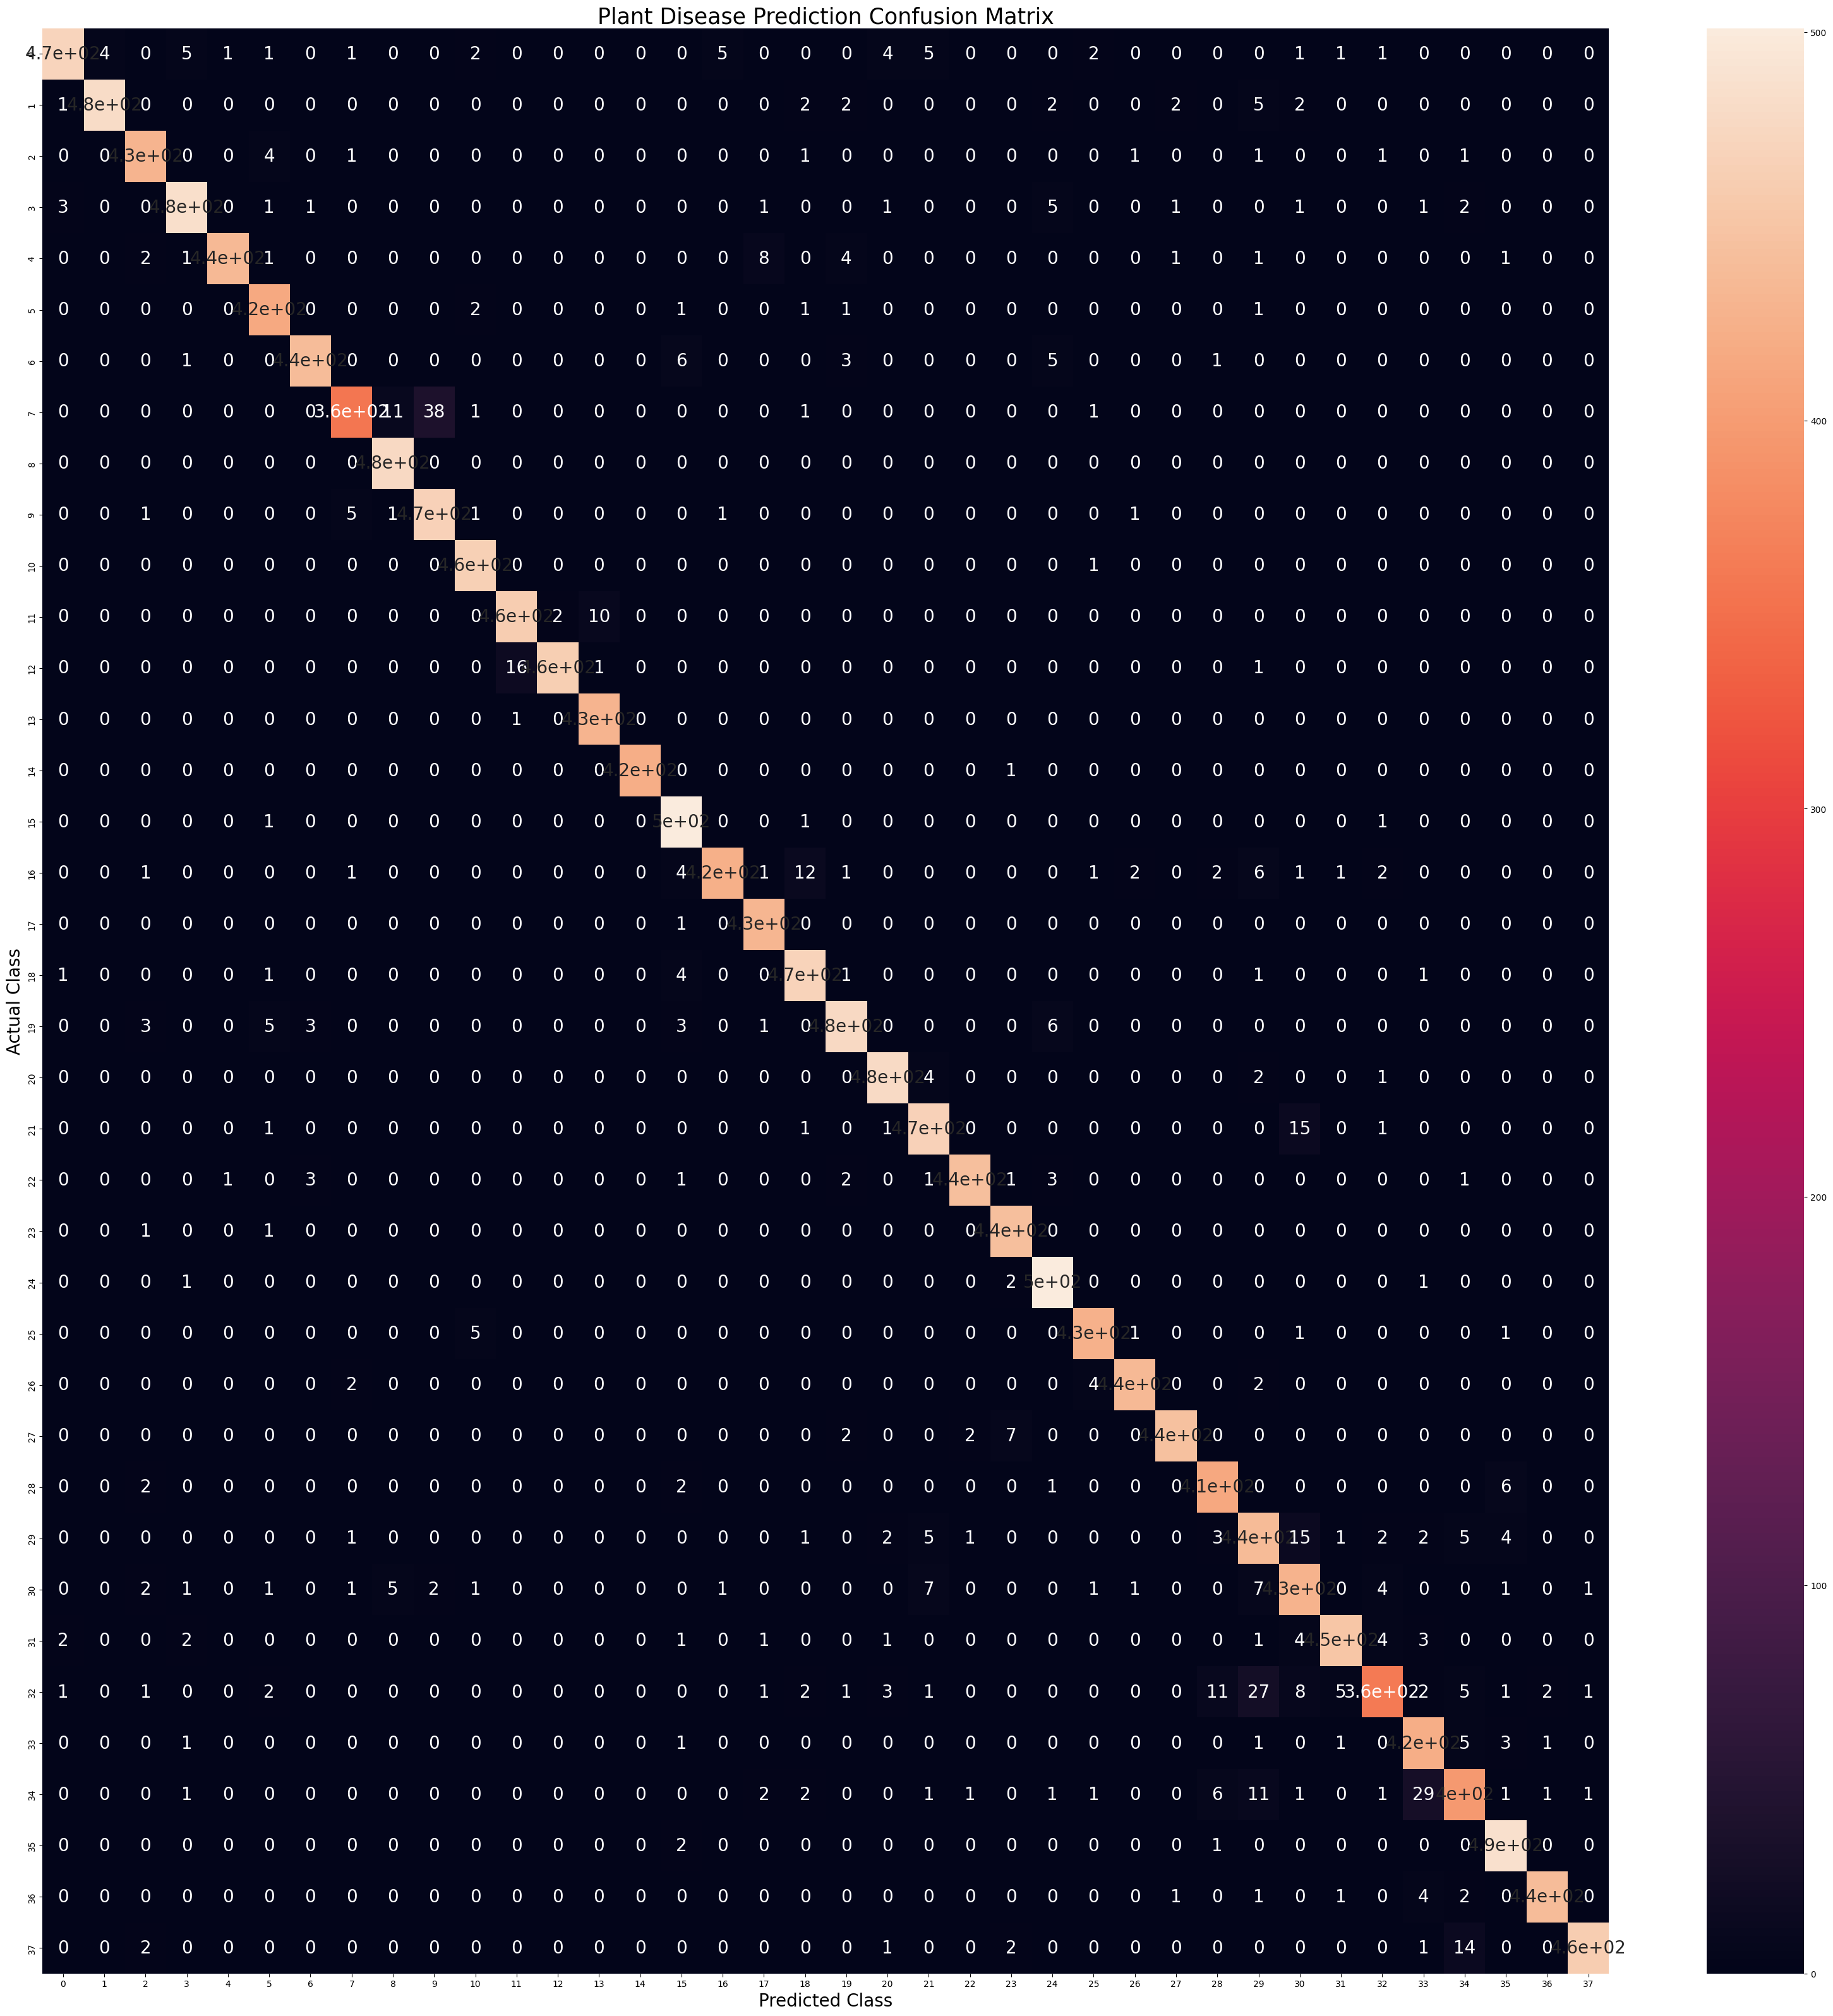

In [82]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':20})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)